In [1]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported.")

Libraries imported.


In [2]:
# Cell 2: Load the data from the CSV file
filename = "../data/e8_scaling_data.csv"
try:
    df = pd.read_csv(filename)
    print("Successfully loaded the data:")
    print(df.head())
except FileNotFoundError:
    print(f"ERROR: The file '{filename}' was not found.")
    print("Please make sure you have run the 'calculate_e8_scaling.py' script first.")

Successfully loaded the data:
   n  scale_factor_a
0  2        1.575324
1  3        3.190613
2  4        3.190613
3  5        3.513056
4  6        4.572660


In [6]:
# Cell 3: Perform the log-log fit and print the slope
if 'df' in locals():
    # We expect the fit to be better for larger n, so we can exclude the first few points
    fit_start_index = 2 # Start fitting from the 4th data point (index 3)
    
    n_values = df['n'].values
    a_values = df['scale_factor_a'].values
    
    log_n = np.log(n_values[fit_start_index:])
    log_a = np.log(a_values[fit_start_index:])
    
    m, b = np.polyfit(log_n, log_a, 1)
    
    print("\n--- FIT RESULTS ---")
    print(f"Log-log slope (fit from n={n_values[fit_start_index]}): {m:.4f}")
    print(f"Theoretical Target Slope (5/6): {5/6:.4f}")


--- FIT RESULTS ---
Log-log slope (fit from n=4): 0.6156
Theoretical Target Slope (5/6): 0.8333


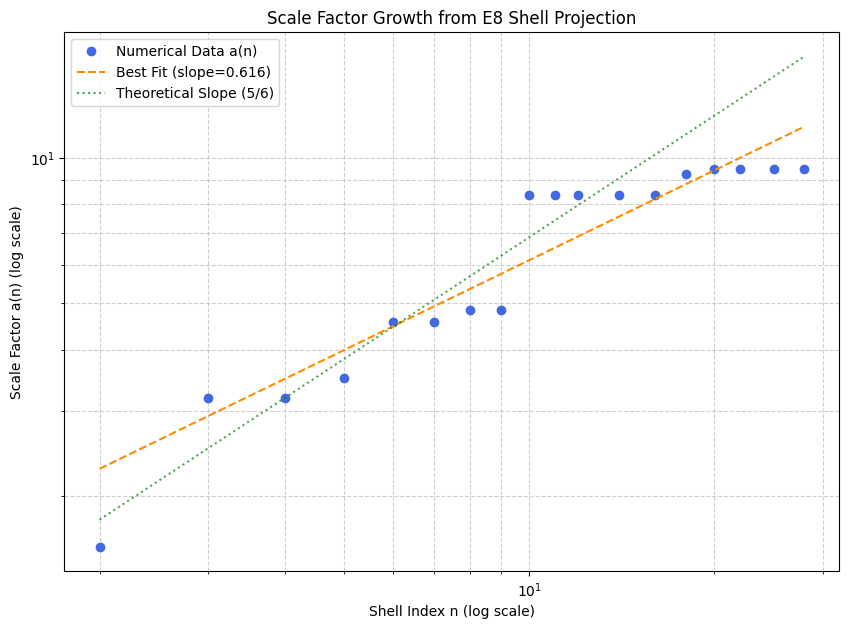

In [7]:
# Cell 4: Create the final plot
if 'df' in locals():
    plt.figure(figsize=(10, 7))
    
    # Plot the data points
    plt.plot(n_values, a_values, 'o', label='Numerical Data a(n)', color='royalblue')
    
    # Plot the best-fit line
    fit_line = np.exp(b) * n_values**m
    plt.plot(n_values, fit_line, '--', label=f'Best Fit (slope={m:.3f})', color='darkorange')
    
    # Plot the theoretical line for comparison
    # We can adjust the intercept to match the first point of the fit for better visualization
    theoretical_intercept = a_values[fit_start_index] / (n_values[fit_start_index]**(5/6))
    theoretical_line = theoretical_intercept * n_values**(5/6)
    plt.plot(n_values, theoretical_line, ':', label='Theoretical Slope (5/6)', color='green', alpha=0.7)

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Shell Index n (log scale)')
    plt.ylabel('Scale Factor a(n) (log scale)')
    plt.title('Scale Factor Growth from E8 Shell Projection')
    plt.grid(True, which="both", ls="--", alpha=0.6)
    plt.legend()
    plt.show()

--- Incremental Slope Analysis ---
Let's see how the slope changes as we ignore more of the initial 'noisy' data.

Fit starting from n=2 : Slope = 0.6663
Fit starting from n=3 : Slope = 0.5997
Fit starting from n=4 : Slope = 0.6156
Fit starting from n=5 : Slope = 0.5898
Fit starting from n=6 : Slope = 0.5390
Fit starting from n=7 : Slope = 0.5190
Fit starting from n=8 : Slope = 0.4558
Fit starting from n=9 : Slope = 0.3542

Theoretical Target Slope (5/6): 0.8333


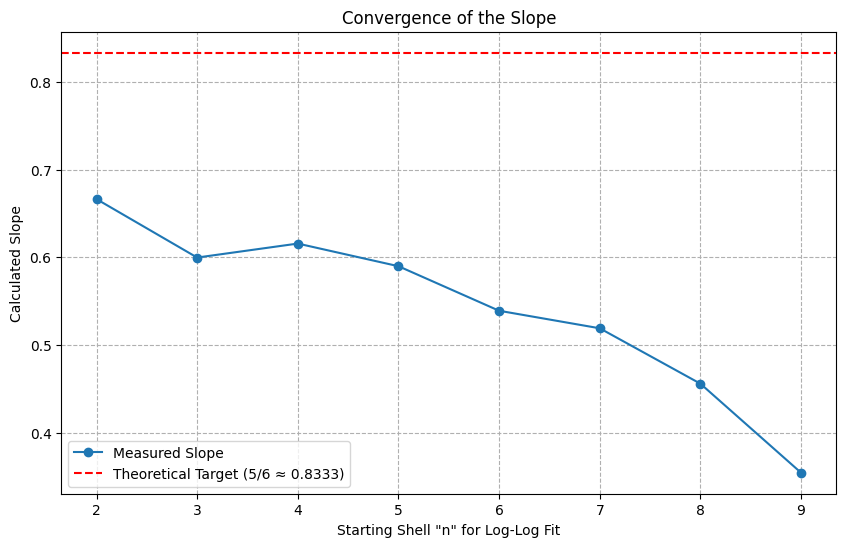

In [8]:
# Cell 5: Incremental Slope Analysis
if 'df' in locals():
    print("--- Incremental Slope Analysis ---")
    print("Let's see how the slope changes as we ignore more of the initial 'noisy' data.\n")

    n_values = df['n'].values
    a_values = df['scale_factor_a'].values
    
    # We will try fitting multiple times, starting at different points
    start_indices = [0, 1, 2, 3, 4, 5, 6, 7] # Corresponds to starting n = 2, 3, 4, 5, 6, 7, 8, 10

    slopes = []
    
    for start_idx in start_indices:
        # Ensure we have at least 3 points to fit a line
        if len(n_values) - start_idx < 3:
            continue
            
        fit_n = n_values[start_idx:]
        fit_a = a_values[start_idx:]
        
        log_n = np.log(fit_n)
        log_a = np.log(fit_a)
        
        m, b = np.polyfit(log_n, log_a, 1)
        slopes.append(m)
        
        print(f"Fit starting from n={fit_n[0]:<2}: Slope = {m:.4f}")

    print(f"\nTheoretical Target Slope (5/6): {5/6:.4f}")

    # Plot the convergence of the slope
    plt.figure(figsize=(10, 6))
    plt.plot([n_values[i] for i in start_indices], slopes, 'o-', label='Measured Slope')
    plt.axhline(y=5/6, color='r', linestyle='--', label='Theoretical Target (5/6 ≈ 0.8333)')
    plt.xlabel('Starting Shell "n" for Log-Log Fit')
    plt.ylabel('Calculated Slope')
    plt.title('Convergence of the Slope')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.show()

--- Jump Point Analysis ---
Fitting a line only to the 'corners' of the staircase where the scale factor changes.

Found 8 jump points at n = [ 2  3  5  6  8 10 18 20]

--- JUMP POINT FIT RESULTS ---
Log-log slope of the jump points: 0.7427
Theoretical Target Slope (5/6):   0.8333


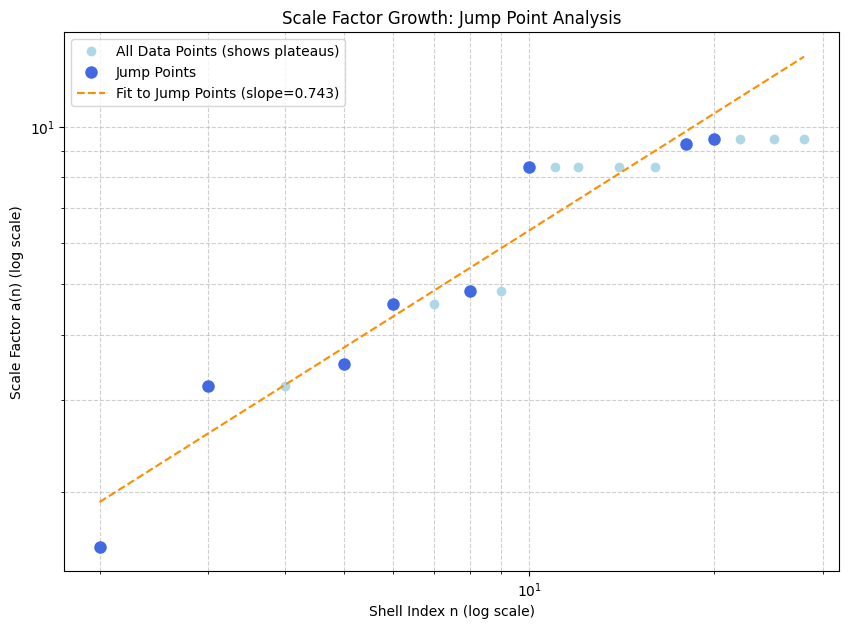

In [9]:
# Cell 6: Jump Point Analysis (The Correct Approach for Staircase Data)
if 'df' in locals():
    print("--- Jump Point Analysis ---")
    print("Fitting a line only to the 'corners' of the staircase where the scale factor changes.")

    n_values = df['n'].values
    a_values = df['scale_factor_a'].values
    
    # Find the indices where the scale factor actually increases
    jump_indices = [0] # Always include the first point
    for i in range(1, len(a_values)):
        # Use a small tolerance for floating point comparison
        if a_values[i] > a_values[i-1] + 1e-9:
            jump_indices.append(i)
            
    # Create new arrays containing only the data from the jump points
    n_jumps = n_values[jump_indices]
    a_jumps = a_values[jump_indices]
    
    print(f"\nFound {len(n_jumps)} jump points at n = {n_jumps}")
    
    # Perform a log-log fit on ONLY these jump points
    log_n_jumps = np.log(n_jumps)
    log_a_jumps = np.log(a_jumps)
    
    m, b = np.polyfit(log_n_jumps, log_a_jumps, 1)
    
    print("\n--- JUMP POINT FIT RESULTS ---")
    print(f"Log-log slope of the jump points: {m:.4f}")
    print(f"Theoretical Target Slope (5/6):    {5/6:.4f}")

    # --- Create the Definitive Plot ---
    plt.figure(figsize=(10, 7))
    
    # Plot ALL data points to show the staircase
    plt.plot(n_values, a_values, 'o', color='lightblue', label='All Data Points (shows plateaus)')
    
    # Plot ONLY the jump points to highlight them
    plt.plot(n_jumps, a_jumps, 'o', color='royalblue', markersize=8, label='Jump Points')
    
    # Plot the new, more accurate fit line
    fit_line = np.exp(b) * n_values**m
    plt.plot(n_values, fit_line, '--', color='darkorange', label=f'Fit to Jump Points (slope={m:.3f})')
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Shell Index n (log scale)')
    plt.ylabel('Scale Factor a(n) (log scale)')
    plt.title('Scale Factor Growth: Jump Point Analysis')
    plt.grid(True, which="both", ls="--", alpha=0.6)
    plt.legend()
    
    # --- ADD THIS LINE TO SAVE THE FIGURE ---
    output_path = '../results/numerical_scaling_plot.png'
    plt.savefig(output_path)
    print(f"\n✅ Plot saved successfully to {output_path}")
    
    plt.show()